# **XLE index analysis**

In [1]:
# Dependencies and libraries
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import datetime
import time

from config import api_key
from tickers import technology_industry 

In [2]:
# Looking at stock performance by industry relevant indexes

# Variable initialization
close_daily_price =[]
ticker_date = []
delta = datetime.timedelta(days=1)

# Search parameters
industry_index = technology_industry
start_date = datetime.datetime(2020,1,1)
end_date = datetime.datetime(2021,1,1)
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY'

# For loop to create the date column and create the results dataframe
while start_date <= end_date:
    
    ticker_date.append(start_date)
    
    # Building the results dataframe
    tech_df = pd.DataFrame({'Date': ticker_date})
    
    start_date += delta
                                    
# Resetting start date
start_date = datetime.datetime(2019,8,1)
                                    
# For loop to make the call for every industry index and retrieving the data
for ticker in industry_index:
    
    # Building the search url
    url = f'{base_url}&symbol={ticker}&outputsize=full&apikey={api_key}'
    
    # Making the API call
    response = requests.get(url)
    response_json = response.json()
    
    #Progress tracker
    print (f'Processing {ticker} with code {response.status_code}')
    
    # Retrieving daily closing prices
    while start_date <= end_date:
    
        # Obtaining date as string
        string_date = start_date.strftime("%Y-%m-%d")

        # Exception for dates with no operation
        try:
            close_daily_price.append(float(response_json['Time Series (Daily)'][string_date]["4. close"]))
        except (KeyError):
            close_daily_price.append(0)  
        
        start_date += delta
                                    
    # Adding the current ticker to the dataframe
    tech_df[ticker] = pd.Series(close_daily_price)
    close_daily_price.clear()
    start_date = datetime.datetime(2019,8,1)
    time.sleep(12)
    
print("API calls done")

Processing AAPL with code 200
Processing MSFT with code 200
Processing V with code 200
Processing MA with code 200
Processing NVDA with code 200
Processing PYPL with code 200
Processing ADBE with code 200
Processing INTC with code 200
Processing CSCO with code 200
Processing CRM with code 200
API calls done


In [3]:
tech_df

,Date,AAPL,MSFT,V,MA,NVDA,PYPL,ADBE,INTC,CSCO,CRM
0,2020-01-01,208.43,138.06,179.17,274.16,164.92,110.80,298.44,49.50,55.39,150.81
1,2020-01-02,204.02,136.90,177.42,269.45,161.19,107.09,293.71,48.68,53.25,145.70
2,2020-01-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-05,193.34,132.21,168.86,256.84,150.79,103.60,280.36,46.97,51.37,142.82
...,...,...,...,...,...,...,...,...,...,...,...
362,2020-12-28,373.01,202.02,196.74,306.33,408.62,176.27,432.26,49.24,46.28,189.50
363,2020-12-29,380.16,204.06,198.58,309.30,418.62,184.60,436.30,48.07,46.71,193.61
364,2020-12-30,384.76,203.90,194.06,309.00,424.56,192.51,438.88,47.99,46.44,191.70
365,2020-12-31,425.04,205.01,190.40,308.53,424.59,196.07,444.32,47.73,47.10,194.85


In [17]:
# Cleaning the results dataframe

# Dropping rows with no values (no stocks operations)
clean_df = tech_df.loc[(tech_df["AAPL"]!=0)&(tech_df["MSFT"]!=0)&(tech_df["V"]!=0)&(tech_df["MA"]!=0)&(tech_df["NVDA"]!=0)&(tech_df["PYPL"]!=0)&(tech_df["ADBE"]!=0)&(tech_df["INTC"]!=0)&(tech_df["CSCO"]!=0)&(tech_df["CRM"]!=0)]
clean_df

# Dropping columns with no data (Indexes not found in the API)

# Creating the list with tickers to keep
keep_columns = []

for column in clean_df:
    column_index = clean_df.columns.get_loc(column)   
    if clean_df.iloc[0, column_index] != 0:
        keep_columns.append(column)
        
clean_df = clean_df[keep_columns]

clean_df

,Date,AAPL,MSFT,V,MA,NVDA,PYPL,ADBE,INTC,CSCO,CRM
0,2020-01-01,208.43,138.06,179.17,274.16,164.92,110.80,298.44,49.50,55.39,150.81
1,2020-01-02,204.02,136.90,177.42,269.45,161.19,107.09,293.71,48.68,53.25,145.70
4,2020-01-05,193.34,132.21,168.86,256.84,150.79,103.60,280.36,46.97,51.37,142.82
5,2020-01-06,197.00,134.69,172.48,264.68,152.35,105.03,286.21,46.96,52.60,142.80
6,2020-01-07,199.04,135.28,175.32,269.31,153.89,106.63,289.02,46.73,52.34,141.64
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,379.24,203.85,196.91,308.86,416.86,177.98,437.10,49.57,47.19,190.96
362,2020-12-28,373.01,202.02,196.74,306.33,408.62,176.27,432.26,49.24,46.28,189.50
363,2020-12-29,380.16,204.06,198.58,309.30,418.62,184.60,436.30,48.07,46.71,193.61
364,2020-12-30,384.76,203.90,194.06,309.00,424.56,192.51,438.88,47.99,46.44,191.70


In [4]:
clean_df.describe()

,AAPL,MSFT,V,MA,NVDA,PYPL,ADBE,INTC,CSCO,CRM
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,194.859809,112.676349,126.600981,197.520681,178.259210,83.390232,231.764019,38.990627,31.484741,113.863542
std,137.887126,78.087231,85.781971,134.219379,135.180152,59.998815,161.871205,26.621007,21.369150,77.802109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,245.520000,143.720000,176.430000,273.150000,206.790000,104.910000,292.460000,52.130000,44.700000,152.820000
75%,301.685000,170.720000,188.785000,295.850000,267.770000,115.450000,349.140000,59.035000,47.150000,172.325000
max,425.040000,214.320000,213.310000,344.560000,424.590000,196.070000,466.200000,68.470000,55.390000,200.740000


In [5]:
clean_df.dtypes

Date    datetime64[ns]
AAPL           float64
MSFT           float64
V              float64
MA             float64
NVDA           float64
PYPL           float64
ADBE           float64
INTC           float64
CSCO           float64
CRM            float64
dtype: object

# **Percentage Price change**

- From our previous analysis we concluded that the energy economic sector suffered a loss of %41.00 during the time period, by analyzing the companies that constitute the index we can clearly see that the tendency continues, but it is interesting to notice that some companies like Pioneer Natural Resource (PXD) was able to soften the blow, a company that is heavily related to low-carbon energy investigation

In [18]:
ticker_list=[]
inititial_price=[]
final_price=[]
#For loop to retrive data
for column in tech_df:
    if column !="Date":
        ticker_list.append(column)
        
        ticker_initial=clean_df.loc[clean_df["Date"]=='2020-01-01',column].tolist()
        inititial_price.append(ticker_initial[0])
        
        ticker_final=clean_df.loc[clean_df["Date"]=='2020-12-31',column].tolist()
        final_price.append(ticker_final[0])
        
                       
#Builiding the price change % dataframe
ava_df=pd.DataFrame({"Ticker":ticker_list,
                    "Initial":inititial_price,
                    "Final":final_price,})

#Comput price change%
ava_df['Percentage Price Change']= (ava_df['Final']-ava_df['Initial'])/(ava_df['Initial'])
ava_df['Percentage Price Change']=(ava_df['Percentage Price Change']*100).map("{:.2f}%".format)
ava_df

,Ticker,Initial,Final,Percentage Price Change
0,AAPL,208.43,425.04,103.92%
1,MSFT,138.06,205.01,48.49%
2,V,179.17,190.40,6.27%
3,MA,274.16,308.53,12.54%
4,NVDA,164.92,424.59,157.45%
5,PYPL,110.80,196.07,76.96%
6,ADBE,298.44,444.32,48.88%
7,INTC,49.50,47.73,-3.58%
8,CSCO,55.39,47.10,-14.97%
9,CRM,150.81,194.85,29.20%


# **Bar chart analysis**

By looking at the graph we can see that there is no significant difference in the price of a stock and its performance, the relative price different stays relatively the same within the industry

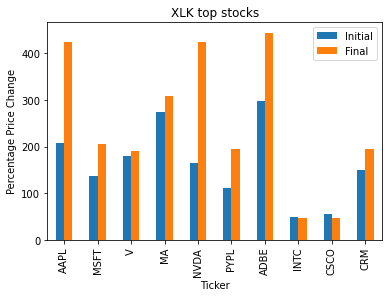

In [19]:
ava_df.plot(kind="bar")
plt.xticks(ava_df.index.tolist(),ava_df["Ticker"].tolist())
plt.title("XLK top stocks")
plt.xlabel("Ticker")
plt.ylabel("Percentage Price Change")


# Saving to png
filename = 'bar_chart.png'
path = os.path.join('tech_analysis', 'plot_images', filename)
plt.savefig(path)
plt.show()

# **Line graph analysis**

Plotting every stock together do provide very valuable insights, as we can see the stocks had a similar behaviour pre-pandemic, as the WHO announces the pandemic the stocks present a small peak, but as quarantines start around the globe, the behaviour of the stocks are somehow erratic with a notable exception of Pioneer Natural Resources (PXD) a company that starts to separate itself from the rest of the stocks. Now, what we believe is one of the most notable phenomena is how all the stocks converge to a couple of weeks after the announcement of Phase 1 vaccines testing. Every stock apparently plummets and tries to converge to a minimum value, and after that, the stock begins to stabilize and recover

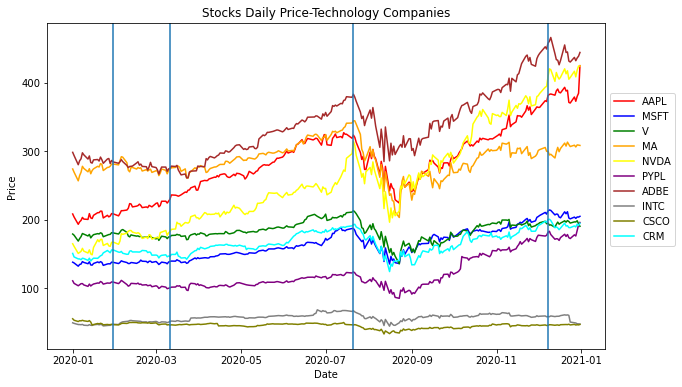

In [42]:
# Generate a scatter plot XPH 
plt.subplots(figsize=(10, 6))

plt.plot(clean_df["Date"],clean_df["AAPL"],color = "red",label = "AAPL")
plt.plot(clean_df["Date"],clean_df["MSFT"],color = "blue",label = "MSFT")
plt.plot(clean_df["Date"],clean_df["V"],color = "green",label = "V")
plt.plot(clean_df["Date"],clean_df["MA"],color = "orange",label = "MA")
plt.plot(clean_df["Date"],clean_df["NVDA"],color = "yellow",label = "NVDA")
plt.plot(clean_df["Date"],clean_df["PYPL"],color = "purple",label = "PYPL")
plt.plot(clean_df["Date"],clean_df["ADBE"],color = "brown",label = "ADBE")
plt.plot(clean_df["Date"],clean_df["INTC"],color = "gray",label = "INTC")
plt.plot(clean_df["Date"],clean_df["CSCO"],color = "olive",label = "CSCO")
plt.plot(clean_df["Date"],clean_df["CRM"],color = "cyan",label = "CRM")
plt.legend(bbox_to_anchor=(1,0.8))


cov_str=datetime.datetime.strptime("2020-01-30","%Y-%m-%d")
cov_np=datetime.datetime.strptime("2020-03-11","%Y-%m-%d")
cov_testv=datetime.datetime.strptime("2020-07-21","%Y-%m-%d")
cov_en=datetime.datetime.strptime("2020-12-08","%Y-%m-%d")
plt.axvline(x=cov_str)
plt.axvline(x=cov_en)
plt.axvline(x=cov_testv)
plt.axvline(x=cov_np)

plt.title('Stocks Daily Price-Technology Companies')
plt.xlabel('Date')
plt.ylabel('Price')



# Saving to png
filename = 'line_chart.png'
path = os.path.join('tech_analysis', 'plot_images', filename)
plt.savefig(path, transparent=False)
plt.show()
